In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [19]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

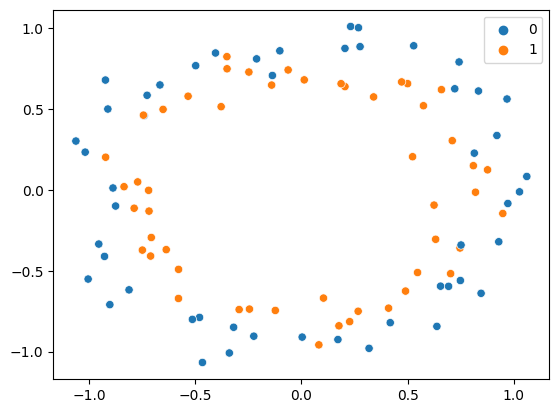

In [20]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [22]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

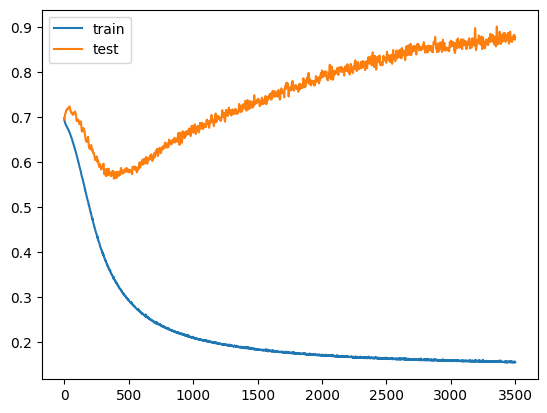

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
#we can see in the graph that after around 300 epochs the gap between train loss and val loss inc that means overfitting happening

9600/9600 [==============================] - 23s 2ms/step


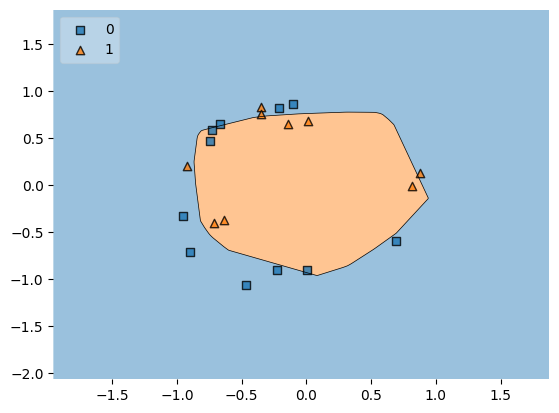

In [27]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [28]:
#early stopping

In [29]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               768       
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
callback = EarlyStopping(
    monitor="val_loss", #generally we do val loss
    min_delta=0.00001, #minimum change in monitor quantity to consider it as improvement
    patience=20, #no. of epochs with no improvements
    verbose=1,#for getting message of early stopping
    mode="auto", #auto min or max, how to measure monitor quantity
    baseline=None, #it is number we give as baseline like baseline human performance that decide underfitting
    restore_best_weights=False #if true then that weight value will be consider that give highest acc or lowest loss
)

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 85ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.5125 - val_loss: 0.7021 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6896 - accuracy: 0.5125 - val_loss: 0.7029 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6886 - accuracy: 0.5375 - val_loss: 0.7037 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6878 - accuracy: 0.5375 - val_loss: 0.7039 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6869 - accuracy: 0.5375 - val_loss: 0.7045 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6861 - accuracy: 0.5375 - val_loss: 0.7053 - val_accuracy: 0.4000
Epoch 8/3500


In [33]:
#it got stopp at 22epoch, saying here only we get our best paramer value

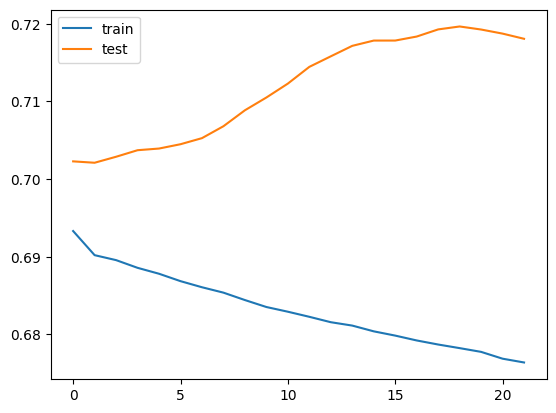

In [34]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 21s 2ms/step


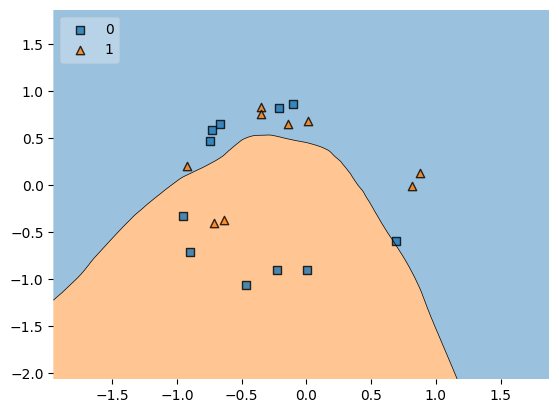

In [35]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()